In [50]:
!pip install folium

In [51]:
import re
import matplotlib.pyplot as plt
import folium
import pandas as pd

In [52]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the first three lines
first_block_header = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()[:3]  # Read the first three lines

    for line in lines:
        first_block_header.append(line)

# Print the extracted first three lines
for header in first_block_header:
    print(header)

2/4/25, 7:31 PM Pairing(s) Report [Bid Period: MAR 2025]

7652 Check-In 05:15 Check-Out 11:06 Category SEA-220-A,B MAR 2025

+---------------------+



In [53]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the block headers
block_headers = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    inside_block = False  # Flag to indicate if we are inside a block
    block_header = []  # List to hold the current block of lines

    for line in lines:
        stripped_line = line.strip()
        
        if stripped_line.startswith("0"):  # Start of a block
            inside_block = True
            block_header = [line]  # Start a new block header
        elif inside_block:
            block_header.append(line)  # Add lines to the current block
        
        if stripped_line.endswith("F S |") and inside_block:  # End of a block
            block_headers.append(''.join(block_header))  # Save the block header
            inside_block = False  # Reset the flag

# Print the extracted block headers
for header in block_headers:
    print(header)

003:06TL 004:36
TAFB 052:51 011:48TL
Total Credit 015:45
Carry Outs:
Date In Period Carry Out
7653 Check-In 06:10 Check-Out 09:05 Category SEA-220-A,B MAR 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

002:25TL 003:55 +---------------------+
TAFB 050:55 012:31TL
Total Credit 015:45
Carry Outs:
Date In Period Carry Out
7654 Check-In 06:10 Check-Out 16:24 Category SEA-220-A,B MAR 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

004:49TL 011:14
TAFB 058:14 014:55TL
Total Credit 017:19
Carry Outs:
Date In Period Carry Out
7655 Check-In 06:10 Check-Out 09:05 Category SEA-220-A,B MAR 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

002:25TL 003:55 +---------------------+
TAFB 050:55 012:31TL
Total Credit 015:45
Carry Outs:
Date In Period Carry Out
about:blank 1/48
2/4/25, 7:31 PM Pairing(s) Report [Bid Period: MAR 2025]
7656 Check-In 06:10 Check-Out 14:35 Category SEA-220-A,B MAR 2025
+

In [54]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the last block footer
last_block_footer = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()  # Read all lines from the file

# Iterate through the lines in reverse order to find the last instance of a line starting with "0"
for i in range(len(lines) - 1, -1, -1):  # Start from the last line and go to the first
    if lines[i].startswith("0"):  # Check if the line starts with "0"
        # Append this line and all subsequent lines to last_block_footer
        last_block_footer.extend(lines[i:])  # Use extend to add all lines from this point onward
        break  # Exit the loop after finding the last instance

# Print the extracted last block footer
for footer in last_block_footer:
    print(footer)  # Strip whitespace for cleaner output

006:02TL 012:09

TAFB 073:29 015:15TL

Total Credit 021:00

Carry Outs:

Date In Period Carry Out

Mar 31 005:04 015:56

about:blank 48/48



In [55]:
# Initialize lists for the two sections
flight_lines = []
layover_lines = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()

# Now, process the lines excluding block headers and footers
for line in lines:
    # Check if the line is part of block headers or footers
    if (any(line in header for header in first_block_header) or 
        any(line in header for header in block_headers) or 
        any(line in header for header in last_block_footer)):  # Check if the line equals last_block_footer
        continue  # Skip this line if it's in block headers or footers
   
    # Categorize the remaining lines
    line = line.strip()  # Strip whitespace from the line
    first_three_chars = line[:3]  # Get the first three characters

    # Check if the first three characters are all uppercase letters
    if len(first_three_chars) == 3 and all(char.isupper() for char in first_three_chars):
        layover_lines.append(line)
    else:
        flight_lines.append(line)

# Print the results
print("Lines starting with a letter:")
for line in layover_lines:
    print(line)

print("\nOther lines:")
for line in flight_lines:
    print(line)

Lines starting with a letter:
IAH 013:10 HILTON AMERICAS 003:10TL 009:20 |-- -- -- -- -- -- -- |
SNA 017:38 RENAISSANCE NEWPORT 005:32TL 008:07 |-- -- |
ORD 016:35 PALMER HOUSE 004:05TL 005:35 |02 03 -- -- 06 -- -- |
SFO 016:13 WESTIN ST. FRANCIS 006:01TL 008:37 |-- -- -- -- -- -- -- |
ORD 016:35 PALMER HOUSE 004:05TL 005:35 |-- -- 04 -- -- -- -- |
SFO 016:13 WESTIN ST. FRANCIS 006:01TL 008:37 |-- -- -- -- -- -- -- |
ORD 016:35 PALMER HOUSE 004:05TL 005:35 |-- -- -- 05 -- -- -- |
SFO 016:13 WESTIN ST. FRANCIS 006:01TL 008:37 |-- -- -- -- -- -- -- |
BOS 021:09 WESTIN COPLEY 004:05TL 009:26 |-- -- -- -- -- -- -- |
AUS 012:11 JW MARRIOTT 004:54TL 006:24 |-- -- -- -- -- -- -- |
ORD 015:45 PALMER HOUSE 004:05TL 005:35 |-- -- -- -- -- -- 08 |
BOS 018:40 WESTIN COPLEY 008:05TL 010:25 |-- 10 -- -- -- -- -- |
IAH 013:43 HILTON AMERICAS 006:28TL 010:17 |-- -- |
SNA 013:36 RENAISSANCE NEWPORT 006:47TL 009:22
BOS 016:30 THE DAGNY BOSTON 008:05TL 010:25 |-- -- -- 12 -- -- -- |
AUS 013:40 JW MARRIOT

In [56]:
import re  # Import the regular expressions module

# Function to find all groups of three capitalized letters in the provided lines
def find_airport_stops(flight_lines):
    airports = []

    for line in flight_lines:
        # Find groups of three capitalized letters in the line
        groups = re.findall(r'\b[A-Z]{3}\b', line)
        airports.extend(groups)  # Add found groups to the airports list
    return airports

airport_stops = find_airport_stops(flight_lines)
print(airport_stops)

['SEA', 'MSP', 'MSP', 'IAH', 'IAH', 'SLC', 'SLC', 'SNA', 'SNA', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'SFO', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'AUS', 'AUS', 'SEA', 'SEA', 'ORD', 'ORD', 'SEA', 'SEA', 'AUS', 'AUS', 'BOS', 'BOS', 'MSP', 'MSP', 'IAH', 'IAH', 'MSP', 'MSP', 'SNA', 'SNA', 'SEA', 'SEA', 'AUS', 'AUS', 'BOS', 'BOS', 'AUS', 'AUS', 'SLC', 'SLC', 'GEG', 'GEG', 'SEA', 'SEA', 'AUS', 'AUS', 'BOS', 'BOS', 'DTW', 'DTW', 'ORD', 'ORD', 'SEA', 'SEA', 'AUS', 'AUS', 'BOS', 'BOS', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'SLC', 'SLC', 'SNA', 'SNA', 'SEA', 'SEA', 'AUS', 'AUS', 'BOS', 'BOS', 'MSP', 'MSP', 'IAH', 'IAH', 'MSP', 'MSP', 'SNA', 'SNA', 'SEA', 'SEA', 'AUS', 'AUS', 'BOS', 'BOS', 'AUS', 'AUS', 'SLC', 'SLC', 'DEN', 'DEN', 'SEA', 'SEA', 'AUS', 'AUS', 'BOS', 'BOS', 'RDU', 'RDU', 'BOS', 'BOS', 'AUS', 'AUS', 'SEA', 'SEA', 'AUS', 'AUS'

In [57]:
# Function to return the first three characters of each line in the provided lines
def find_first_airport_stop(layover_lines):
    airports = []
    
    for line in layover_lines:
        # Get the first three characters of the line
        first_three_chars = line[:3]  # Slicing to get the first three characters
        airports.append(first_three_chars)  # Add to the airports list
    
    return airports

airport_layovers = find_first_airport_stop(layover_lines)
print(airport_layovers)

['IAH', 'SNA', 'ORD', 'SFO', 'ORD', 'SFO', 'ORD', 'SFO', 'BOS', 'AUS', 'ORD', 'BOS', 'IAH', 'SNA', 'BOS', 'AUS', 'GEG', 'BOS', 'ORD', 'BOS', 'LGA', 'DFW', 'SNA', 'BOS', 'IAH', 'SNA', 'BOS', 'AUS', 'DEN', 'BOS', 'BOS', 'AUS', 'BOS', 'LGA', 'LGA', 'ORD', 'ORD', 'ORD', 'GEG', 'ORD', 'GEG', 'SNA', 'IAD', 'SNA', 'BUR', 'SFO', 'SNA', 'ANC', 'SNA', 'ANC', 'SNA', 'ANC', 'SNA', 'ANC', 'SNA', 'ANC', 'ANC', 'ANC', 'DFW', 'DEN', 'DEN', 'SFO', 'LGA', 'LGA', 'DFW', 'SNA', 'MSP', 'SNA', 'ANC', 'MSP', 'MSP', 'MSP', 'SNA', 'MSP', 'SNA', 'SFO', 'SFO', 'MCI', 'MSP', 'SNA', 'MCI', 'LGA', 'ORD', 'GEG', 'SNA', 'AUS', 'GEG', 'SNA', 'AUS', 'GEG', 'SNA', 'AUS', 'AUS', 'AUS', 'AUS', 'GEG', 'BUR', 'AUS', 'SBA', 'SNA', 'SFO', 'SFO', 'SFO', 'ANC', 'SFO', 'AUS', 'BOS', 'ORD', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'GEG', 'SNA', 'SBA', 'ORD', 'SFO', 'ANC', 'SFO', 'SFO', 'ANC', 'ANC', 'SBA', 'AUS', 'SBA', 'DFW', 'ORD', 'SBA', 'DFW', 'SFO', 'MCI', 'SNA', 'SFO', 'DEN', 'ORD', 'DEN', 'IAH', 'SNA', 'GEG', 'AUS', 'GEG'

In [58]:
from collections import Counter

In [59]:
# Count instances of each string
stops_summary = Counter(airport_stops)

# Print the summary
print(stops_summary)

Counter({'SEA': 688, 'SNA': 178, 'SLC': 170, 'MSP': 152, 'AUS': 104, 'SFO': 102, 'DFW': 92, 'ORD': 88, 'ANC': 84, 'SAN': 72, 'LGA': 68, 'IAH': 66, 'GEG': 50, 'SJC': 44, 'DEN': 44, 'FAI': 42, 'BOS': 32, 'MCI': 26, 'IAD': 22, 'SBA': 18, 'DCA': 16, 'ATL': 14, 'TUS': 8, 'JFK': 7, 'RDU': 6, 'SRQ': 6, 'BUR': 5, 'YVR': 4, 'MKE': 4, 'DTW': 2, 'PDX': 2, 'MSY': 2, 'PHL': 2, 'BWI': 2, 'SAT': 2, 'JAX': 2, 'LAX': 1, 'EWR': 1})


In [60]:
# Get the counts sorted from highest to lowest
sorted_stops = stops_summary.most_common()

In [61]:
# Prepare data for plotting
stops_labels, stops_counts = zip(*sorted_stops)  # Unzip the sorted counts into labels and counts

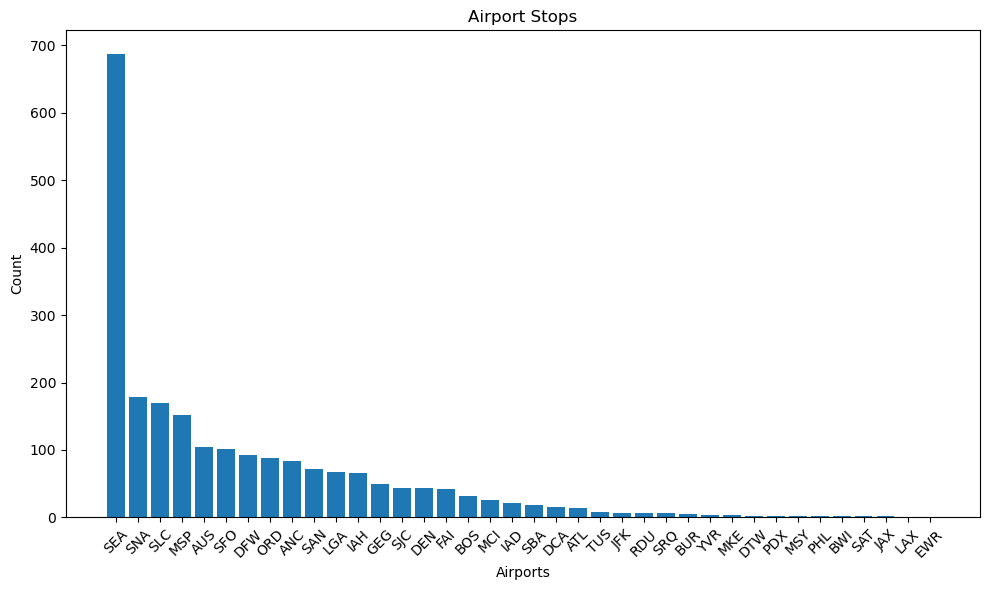

In [62]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(stops_labels, stops_counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airport Stops')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels
# Save the plot
plt.savefig('../dist/airport_stops.png')  # Save as a PNG file
plt.show()

In [63]:
# Count instances of each string
airport_layovers_summary = Counter(airport_layovers)

# Print the summary
print(airport_layovers_summary)

Counter({'SNA': 72, 'ORD': 43, 'AUS': 43, 'ANC': 41, 'DFW': 29, 'SFO': 28, 'GEG': 25, 'LGA': 25, 'IAH': 22, 'MSP': 22, 'FAI': 21, 'SJC': 20, 'DEN': 19, 'DCA': 16, 'BOS': 15, 'MCI': 12, 'SBA': 9, 'BUR': 4, 'IAD': 3, 'JFK': 2, 'MKE': 2, 'LAX': 1, 'BWI': 1, 'SAT': 1, 'RDU': 1})


In [64]:
# Get the counts sorted from highest to lowest
airport_layovers_counts = airport_layovers_summary.most_common()
# Prepare data for plotting
layover_labels, layover_counts = zip(*airport_layovers_counts)  # Unzip the sorted counts into labels and counts

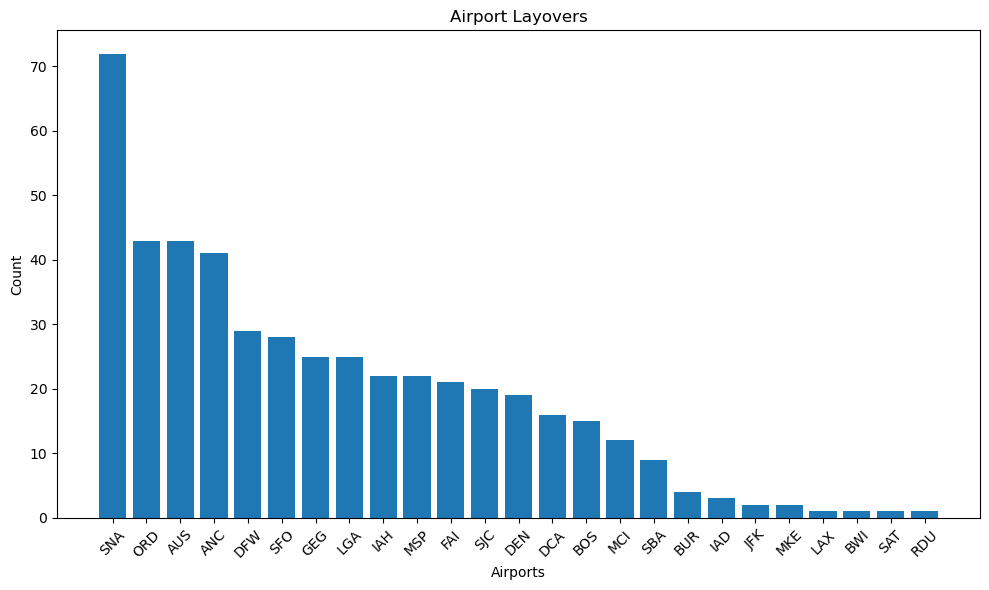

In [65]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(layover_labels, layover_counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airport Layovers')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Save the plot
plt.savefig('../dist/airport_layover.png')  # Save as a PNG file
plt.show()

In [66]:
# Load the OpenFlights airports data
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
airports_df = pd.read_csv(url, header=None, names=columns)

# Filter for relevant columns (IATA, Latitude, Longitude)
airport_locations = airports_df[['IATA', 'Name', 'Latitude', 'Longitude']]

# Display the first few rows
print(airport_locations.head())

  IATA                                         Name  Latitude   Longitude
0  GKA                               Goroka Airport -6.081690  145.391998
1  MAG                               Madang Airport -5.207080  145.789001
2  HGU                 Mount Hagen Kagamuga Airport -5.826790  144.296005
3  LAE                               Nadzab Airport -6.569803  146.725977
4  POM  Port Moresby Jacksons International Airport -9.443380  147.220001


In [67]:
# Convert custom airports to DataFrame
stops_airports_df = pd.DataFrame(list(stops_summary.items()), columns=['IATA', 'Count'])
print(stops_airports_df.head())

  IATA  Count
0  SEA    688
1  MSP    152
2  IAH     66
3  SLC    170
4  SNA    178


In [68]:
# Merge the custom airports with the OpenFlights data to get lat/long
stops_merged_data = pd.merge(stops_airports_df, airport_locations, on='IATA', how='left')
print(stops_merged_data.head())

  IATA  Count                                               Name   Latitude  \
0  SEA    688               Seattle Tacoma International Airport  47.449001   
1  MSP    152  Minneapolis-St Paul International/Wold-Chamber...  44.882000   
2  IAH     66       George Bush Intercontinental Houston Airport  29.984400   
3  SLC    170               Salt Lake City International Airport  40.788399   
4  SNA    178           John Wayne Airport-Orange County Airport  33.675701   

    Longitude  
0 -122.308998  
1  -93.221802  
2  -95.341400  
3 -111.977997  
4 -117.867996  


In [69]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
airport_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airport Stops Map</b></h3>
             '''
airport_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in stops_merged_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 5,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(airport_map)

# Save the map to an HTML file
airport_map.save("../dist/airport_stops_map.html")

# Display the map
airport_map

In [70]:
# Convert custom airports to DataFrame
layover_airports_df = pd.DataFrame(list(airport_layovers_summary.items()), columns=['IATA', 'Count'])
print(layover_airports_df.head())

  IATA  Count
0  IAH     22
1  SNA     72
2  ORD     43
3  SFO     28
4  BOS     15


In [71]:
# Merge the custom airports with the OpenFlights data to get lat/long
layover_data = pd.merge(layover_airports_df, airport_locations, on='IATA', how='left')
print(layover_data.head())

  IATA  Count                                               Name   Latitude  \
0  IAH     22       George Bush Intercontinental Houston Airport  29.984400   
1  SNA     72           John Wayne Airport-Orange County Airport  33.675701   
2  ORD     43               Chicago O'Hare International Airport  41.978600   
3  SFO     28                San Francisco International Airport  37.618999   
4  BOS     15  General Edward Lawrence Logan International Ai...  42.364300   

    Longitude  
0  -95.341400  
1 -117.867996  
2  -87.904800  
3 -122.375000  
4  -71.005203  


In [72]:
nan_data = layover_data[layover_data.isna().any(axis=1)]
print(nan_data)

Empty DataFrame
Columns: [IATA, Count, Name, Latitude, Longitude]
Index: []


In [73]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
layover_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airport Layover Map</b></h3>
             '''
layover_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in layover_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 1,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(layover_map)

# Save the map to an HTML file
layover_map.save("../dist/airport_layover_map.html")

# Display the map
layover_map